In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/investing theory/bogleheads_all_data_investing_theory.csv')

In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/personalfinanceforum/bogleheads_all_data_personal_finance.csv')

In [ ]:
data2 = pd.concat([data1, data])

In [ ]:
data2.columns

Index(['post_date', 'post_text', 'reply_date', 'reply_text',
       'replier_posts_count', 'response_time'],
      dtype='object')

In [ ]:
data2 = data2.drop(['post_id', 'post_title', 'post_author', 'replier'], axis = 1)

In [ ]:
from datetime import datetime as dt
#parse the reply_date and post_date into datetime format
data2['reply_date']=pd.to_datetime(data2['reply_date'])
data2['post_date']=pd.to_datetime(data2['post_date'])
#add a response_time feature
data2['response_time']=(data2['reply_date'] - data2['post_date']).dt.days

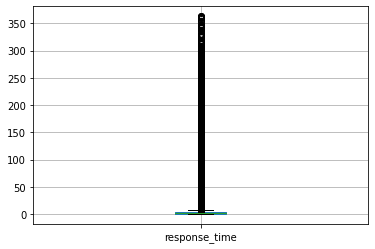

In [ ]:
data2.boxplot(column = ['response_time'])

In [ ]:
data2.shape

(251472, 6)

In [ ]:
data2 = data2[data2['response_time']<100]

In [ ]:
data2 = data2.dropna()

In [ ]:
data2.isnull().sum()

post_date              0
post_text              0
reply_date             0
reply_text             0
replier_posts_count    0
response_time          0
dtype: int64

In [ ]:
data2['len_q'] = data2['post_text'].str.split().str.len()
data2['len_a'] = data2['reply_text'].str.split().str.len()

remove link

In [ ]:
data2 = data2[~data2['post_text'].str.contains("https", case=False)]

In [ ]:
data2 = data2[~data2['reply_text'].str.contains("https", case=False)]

remove bad answer and questions

In [ ]:
data2 = data2[data2['len_q']>6.0]

In [ ]:
data2 = data2[data2['len_a']>5.0]

In [ ]:
data3 = data2[(data2['len_q']/data2['len_a']<10.0) | (data2['replier_posts_count']> 500)]

delete ones where question is ten times longer than the answer or replier_posts_count is less than 500

In [ ]:
data3.describe()

,replier_posts_count,response_time,len_q,len_a
count,187275.000000,187275.000000,187275.000000,187275.00000
mean,7014.780115,3.915312,189.167743,84.14562
std,12476.217074,11.638776,182.121123,88.77609
min,1.000000,0.000000,7.000000,6.00000
25%,593.000000,0.000000,82.000000,29.00000
50%,2253.000000,1.000000,135.000000,57.00000
75%,8417.000000,2.000000,233.000000,106.00000
max,86690.000000,99.000000,2160.000000,2281.00000


In [ ]:
data2.describe()

,replier_posts_count,response_time,len_q,len_a
count,193363.000000,193363.000000,193363.000000,193363.000000
mean,6799.935489,3.936772,195.462477,82.182150
std,12335.954929,11.689370,190.238193,88.105078
min,1.000000,0.000000,7.000000,6.000000
25%,522.000000,0.000000,83.000000,28.000000
50%,2096.000000,1.000000,139.000000,55.000000
75%,8258.000000,2.000000,239.000000,104.000000
max,86690.000000,99.000000,2160.000000,2281.000000


In [ ]:
data2[data2['replier_posts_count']== 100]

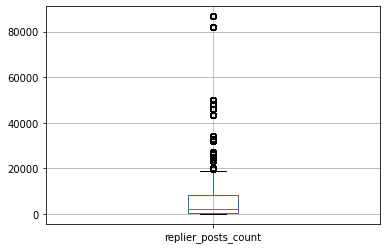

In [ ]:
data2.boxplot(column = ['replier_posts_count'])

In [ ]:
data2[data2.duplicated(subset=['post_text'])]

,post_date,post_text,reply_date,reply_text,replier_posts_count,response_time,len_q,len_a
2,2022-07-08,"I currently have car, homeowners, and umbrella...",2022-07-08,I have tried online places where you enter you...,7871.0,0,163,168
4,2022-05-20,Wondering if for a married couple purchasing h...,2022-05-20,In our case the older person (me) is listed as...,6059.0,0,72,233
5,2022-05-20,Wondering if for a married couple purchasing h...,2022-05-20,My wife is self-employed and I am retired. We ...,648.0,0,72,54
6,2022-05-20,Wondering if for a married couple purchasing h...,2022-05-20,When the wife and I signed up for ACA Marketpl...,586.0,0,72,229
7,2022-05-20,Wondering if for a married couple purchasing h...,2022-05-20,My Medicare started half way through the year ...,6059.0,0,72,21
...,...,...,...,...,...,...,...,...
112669,2022-06-28,I just read the three fund book and looking in...,2022-06-29,I believe that the academic finance community ...,7365.0,1,59,91
112670,2022-06-28,I just read the three fund book and looking in...,2022-06-30,"I suspect for most BHs, the choice is a Total ...",468.0,2,59,219
112671,2022-06-28,I just read the three fund book and looking in...,2022-06-30,"I posted this once before, but will re-post he...",724.0,2,59,51
112675,2021-12-31,"Hello, I believe I have an error and am wonder...",2021-12-31,I hold FOCPX in my Roth account. It distribute...,1055.0,0,96,23


In [ ]:
data3 = data3[data3['response_time']<50]

In [ ]:
data3 = data3[(data3['len_q']/data3['len_a']<5.0)| (data3['replier_posts_count']> 2000)]

In [ ]:
!pip install textstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 35.7 MB/s eta 0:00:00


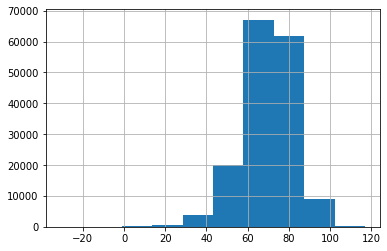

In [ ]:
from textstat import flesch_reading_ease
import textstat
data3['post_text'].apply(lambda x : flesch_reading_ease(x)).hist()

In general both the questions' and answers' readability are very good so i'll just do some trimming

In [ ]:
data3['post_text_complex'] = data3['post_text'].apply(lambda x : flesch_reading_ease(x))
data3['reply_text_complex'] = data3['reply_text'].apply(lambda x : flesch_reading_ease(x))

In [ ]:
data3['complex2_q'] = data3['post_text'].apply(lambda x : textstat.mcalpine_eflaw(x))

In [ ]:
data3 = data3[(data3['post_text_complex']>30)&(data3['reply_text_complex']>30)]

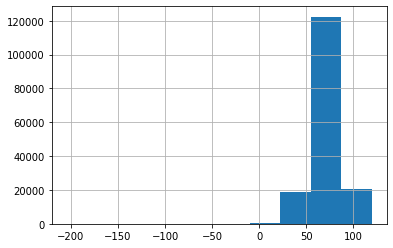

In [ ]:
data3['reply_text'].apply(lambda x : flesch_reading_ease(x)).hist()

In [ ]:
data3.shape

(160413, 11)

In [ ]:
data3.to_csv('/content/drive/MyDrive/investing theory/unprocessed_merged_cleaned_data.csv')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/investing theory/unprocessed_merged_cleaned_data.csv')

In [3]:
df.head()

,Unnamed: 0,post_date,post_text,reply_date,reply_text,replier_posts_count,response_time,len_q,len_a,post_text_complex,reply_text_complex,complex2_q
0,0,2022-11-20,I intend to tell a friend that he is to be pai...,2022-11-20,Unless this is a person who you are committed ...,2549.0,0,80,92,100.38,76.82,20.0
1,1,2022-07-08,"I currently have car, homeowners, and umbrella...",2022-07-08,I used to think shopping myself online made se...,401.0,0,163,94,67.69,74.90,28.4
2,2,2022-07-08,"I currently have car, homeowners, and umbrella...",2022-07-08,I have tried online places where you enter you...,7871.0,0,163,168,67.69,74.19,28.4
3,3,2022-05-20,Wondering if for a married couple purchasing h...,2022-05-20,True. But not much in the way of administrativ...,14856.0,0,72,12,64.04,67.76,32.7
4,4,2022-05-20,Wondering if for a married couple purchasing h...,2022-05-20,In our case the older person (me) is listed as...,6059.0,0,72,233,64.04,66.88,32.7


In [6]:
question_words = ["what", "why", "when", "where", 
             "name", "is", "how", "do", "does", 
             "which", "are", "could", "would", 
             "should", "has", "have", "whom", "whose", "don't"]

In [9]:
df.shape

(160413, 12)

In [29]:
df[df['post_text'].str.contains('|'.join(question_words), case = False)].sort_values(by='len_q', ascending=False)

,Unnamed: 0,post_date,post_text,reply_date,reply_text,replier_posts_count,response_time,len_q,len_a,post_text_complex,reply_text_complex,complex2_q,tokenized_q
127661,55922,2022-04-24,Summary: Investors with a rolling 10-year ladd...,2022-04-24,"I'm not a fan of DIY rolling bond ladders, so ...",14883.0,0,2160,99,85.79,63.22,16.3,"[Summary, :, Investors, with, a, rolling, 10-y..."
127662,55923,2022-04-24,Summary: Investors with a rolling 10-year ladd...,2022-04-24,If there were a small enough spread and/or a s...,11894.0,0,2160,145,85.79,63.83,16.3,"[Summary, :, Investors, with, a, rolling, 10-y..."
29675,42892,2022-06-12,"Nowadays, investors have become more personall...",2022-06-13,A responsible adult has an emergency fund suff...,6410.0,1,1939,157,52.80,51.58,25.6,"[Nowadays, ,, investors, have, become, more, p..."
29673,42886,2022-06-12,"Nowadays, investors have become more personall...",2022-06-13,"Given your concerns, keeping a separate bank a...",8417.0,1,1939,94,52.80,32.23,25.6,"[Nowadays, ,, investors, have, become, more, p..."
29672,42884,2022-06-12,"Nowadays, investors have become more personall...",2022-06-13,If your children are minors doing that probabl...,8417.0,1,1939,53,52.80,57.98,25.6,"[Nowadays, ,, investors, have, become, more, p..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98310,4469,2022-02-27,What emerging markets funds hold Russian stocks?,2022-03-03,"Currently, VXUS holds 7717 stocks and there ar...",12072.0,4,7,75,81.29,90.09,7.0,"[What, emerging, markets, funds, hold, Russian..."
98311,4470,2022-02-27,What emerging markets funds hold Russian stocks?,2022-03-03,Great data My guess is that iShares fund (DVY...,45947.0,4,7,356,81.29,67.59,7.0,"[What, emerging, markets, funds, hold, Russian..."
98312,4471,2022-02-27,What emerging markets funds hold Russian stocks?,2022-03-03,It's certainly at least a Russian/Ukrainian bl...,11894.0,4,7,74,81.29,73.37,7.0,"[What, emerging, markets, funds, hold, Russian..."
98313,4472,2022-02-27,What emerging markets funds hold Russian stocks?,2022-03-03,If you correctly anticipated the attack then y...,45947.0,4,7,90,81.29,53.41,7.0,"[What, emerging, markets, funds, hold, Russian..."


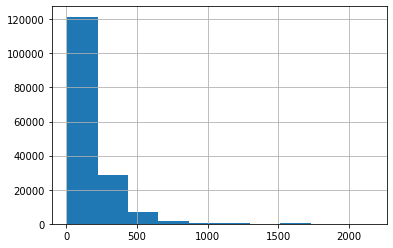

In [38]:
df['len_q'].hist(bins=10)

after sorting there are still a lot of long questions, so I'm going to get the questions that have a len less than 250

In [48]:
df[df['len_q']<100].sort_values(by='len_q', ascending = False).head()

,Unnamed: 0,post_date,post_text,reply_date,reply_text,replier_posts_count,response_time,len_q,len_a,post_text_complex,reply_text_complex,complex2_q,tokenized_q
100883,10114,2022-04-04,Setting aside Japan's brief bursting asset bub...,2022-04-05,They are different... Bonds are bonds and equi...,102.0,1,99,91,42.92,51.44,25.8,"[Setting, aside, Japan, 's, brief, bursting, a..."
148309,91531,2022-04-15,I was reading the “why save over 25x” thread ...,2022-04-15,I try to keep a fixed number 70x and spend ev...,1558.0,0,99,23,71.65,81.97,24.2,"[I, was, reading, the, “, why, save, over, 25x..."
148311,91534,2022-04-15,I was reading the “why save over 25x” thread ...,2022-04-15,It’s definitely a personal decision but I’m tr...,4883.0,0,99,93,71.65,65.05,24.2,"[I, was, reading, the, “, why, save, over, 25x..."
148312,91535,2022-04-15,I was reading the “why save over 25x” thread ...,2022-04-15,"How did you arrive at 4%, especially when it s...",12501.0,0,99,27,71.65,66.74,24.2,"[I, was, reading, the, “, why, save, over, 25x..."
148313,91536,2022-04-15,I was reading the “why save over 25x” thread ...,2022-04-15,My wife and I insurance for $6500 deduct per p...,2333.0,0,99,51,71.65,88.06,24.2,"[I, was, reading, the, “, why, save, over, 25x..."
